# CDAW CME Catalog Analysis Notebook - Properties
This notebook is for analyzing current CDAW CME catalog to look for differences in CMEs.

Want to understand estimated properties of CME events and build a histogram/plots of this 
data.

In [4]:
import requests
import pandas as pd

Need_To_Redownload = False
CME_Catalog_Filename = '../cme_event_catalog.csv'

In [42]:
import numpy as np
import matplotlib.pyplot as plt
    
def plot_data (xdata, ydata, xlabel="", ylabel="", title="", alpha=1.0, ylog:bool=False, xlog:bool=False):

    fig, ax = plt.subplots()
    #plt.style.use('fivethirtyeight')
    
    ax.plot(xdata, ydata, 'ro', alpha=alpha)
    ax.set_title(title)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    
    if ylog:
        ax.set_yscale('log')

    if xlog:
        ax.set_xscale('log')
    
    
def plot_hist(data, what, nbins:int=100, ylog:bool=False, xlow:int=0, xhigh:int=None, nofill:bool=False):
    
    fig, ax = plt.subplots()
        
    if nofill:
        data.hist(ax=ax, bins=nbins, bottom=0, fill=None)
    else:
        data.hist(ax=ax, bins=nbins, bottom=0)
    ax.set_title("Histogram")
    ax.set(xlabel=what, ylabel="Num/bin")
    
    if xlow != None and xhigh != None:
        plt.xlim(xlow, xhigh)
        
    #plt.xticks(rotation=90)
    
    #plt.style.use('fivethirtyeight')
    if ylog:
        ax.set_yscale('log')
        #ax.set_xscale('log')

In [7]:
# load dataset
c2_c3_data = pd.read_csv(CME_Catalog_Filename)
len(c2_c3_data)

7618

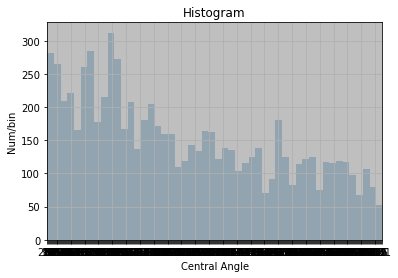

In [10]:
plot_hist(c2_c3_data['Central'], nbins=50, what='Central Angle', ylog=False, xhigh=359)

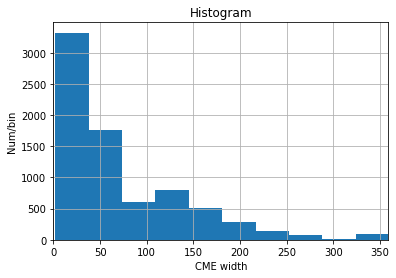

In [11]:
plot_hist(pd.to_numeric(c2_c3_data['Width']), nbins=10, what='CME width', ylog=False, xhigh=359)

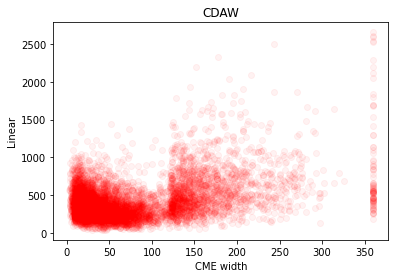

In [12]:
plot_data(pd.to_numeric(c2_c3_data['Width']), pd.to_numeric(c2_c3_data['Linear']), xlabel='CME width', ylabel='Linear', title="CDAW", alpha=0.05)

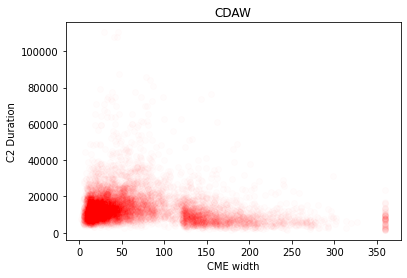

In [13]:
plot_data(pd.to_numeric(c2_c3_data['Width']), pd.to_numeric(c2_c3_data['Duration_C2']), xlabel='CME width', ylabel='C2 Duration', title="CDAW", alpha=0.01)

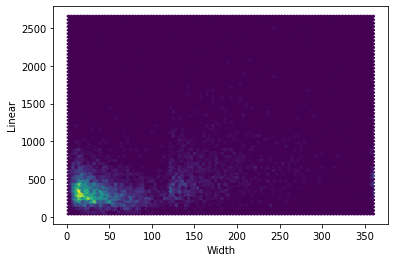

In [14]:
n = 1000 # len(c2_c3_data)
x = pd.to_numeric(c2_c3_data['Width'])
y = pd.to_numeric(c2_c3_data['Linear'])
plt.hexbin(x,y)
plt.xlabel("Width")
plt.ylabel("Linear")
plt.show()

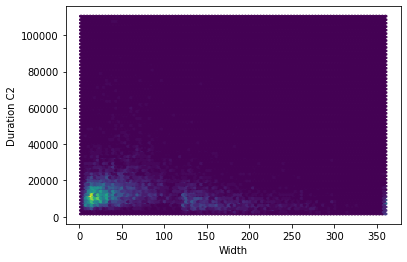

In [15]:
n = 100 # len(c2_c3_data)
x = pd.to_numeric(c2_c3_data['Width'])
y = pd.to_numeric(c2_c3_data['Duration_C2'])
plt.hexbin(x,y)
plt.xlabel("Width")
plt.ylabel("Duration C2")
plt.locator_params(axis='y', nbins=10)
plt.locator_params(axis='x', nbins=10)
#plt.axis.set_xticks(20)
plt.show()

In [16]:
c2_c3_data

,Date,Time,Central,Width,Linear,2nd,order,speed,Accel,Mass,...,Remarks,Duration_C2,Duration_C3,StartTime_C3_Delta,width,linear,mpa,mass,kinetic,accel
0,1996/01/31,06:52:13,274,47,158,219,99,0,-12.3*,2.5e+14*,...,Poor Event; Only 3 points\n,26582.278481,116518.987342,9746.835443,47,158,272,2.500000e+14,3.200000e+28,-12.3
1,1996/02/12,05:47:26,91,53,160,100,211,236,2.0*,1.3e+15,...,Poor Event\n,26250.000000,115062.500000,9625.000000,53,160,92,1.300000e+15,1.600000e+29,2.0
2,1996/03/02,04:11:53,88,36,108,95,120,177,1.0*,1.5e+14,...,Poor Event\n,38888.888889,170462.962963,14259.259259,36,108,86,1.500000e+14,8.700000e+27,1.0
3,1996/03/07,07:51:56,91,43,60,60,61,75,0.1*,-------,...,Poor Event\n,70000.000000,306833.333333,25666.666667,43,60,87,0.000000e+00,0.000000e+00,0.1
4,1996/03/09,04:27:49,84,39,93,102,82,0,-1.1*,-------,...,Only 3 points\n,45161.290323,197956.989247,16559.139785,39,93,82,0.000000e+00,0.000000e+00,-1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7613,2020/08/29,00:00:05,86,16,281,220,339,478,8.4*,-------,...,Poor Event\n,14946.619217,65516.014235,5480.427046,16,281,89,0.000000e+00,0.000000e+00,8.4
7614,2020/08/29,15:36:05,284,11,196,227,163,0,-4.8*,-------,...,Poor Event\n,21428.571429,93928.571429,7857.142857,11,196,282,0.000000e+00,0.000000e+00,-4.8
7615,2020/08/29,19:48:05,285,10,218,231,204,79,-2.0*,-------,...,Poor Event\n,19266.055046,84449.541284,7064.220183,10,218,272,0.000000e+00,0.000000e+00,-2.0
7616,2020/08/30,01:25:44,258,42,117,0,213,286,3.5*,-------,...,Poor Event\n,35897.435897,157350.427350,13162.393162,42,117,250,0.000000e+00,0.000000e+00,3.5


In [20]:
# pull out SBO group, 50~<Width~<90 from Vourlidas and Webb 2018
sbo_data = c2_c3_data[pd.to_numeric(c2_c3_data['Width']) > 50.]
sbo_data = sbo_data[pd.to_numeric(sbo_data['Width']<90.)]
sbo_data = c2_c3_data

In [26]:
# clean up data, make numeric, get rid of asterisk in columns
sbo_data['width'] = pd.to_numeric(sbo_data['Width'])
#sbo_data['central'] = pd.to_numeric(sbo_data['Central'])
sbo_data['linear'] = pd.to_numeric(sbo_data['Linear'])
sbo_data['mpa'] = pd.to_numeric(sbo_data['MPA'])
#sbo_data['cpa_mpa'] = sbo_data['central'] - sbo_data['mpa']
sbo_data['c2_time'] = pd.to_numeric(sbo_data['Duration_C2'])
sbo_data['mass'] = pd.to_numeric([i.replace('*', '').replace('-','0') for i in sbo_data['Mass']])
sbo_data['kinetic'] = pd.to_numeric([i.replace('*', '').replace('-','0') for i in sbo_data['Kinetic']])
sbo_data['accel'] = pd.to_numeric([i.replace('*', '').replace('--', '0') for i in sbo_data['Accel']])
sbo_data[['accel', 'Accel', 'mass', 'Mass', 'Central', 'kinetic']]

,accel,Accel,mass,Mass,Central,kinetic
0,-12.3,-12.3*,2.500000e+14,2.5e+14*,274,3.200000e+28
1,2.0,2.0*,1.300000e+15,1.3e+15,91,1.600000e+29
2,1.0,1.0*,1.500000e+14,1.5e+14,88,8.700000e+27
3,0.1,0.1*,0.000000e+00,-------,91,0.000000e+00
4,-1.1,-1.1*,0.000000e+00,-------,84,0.000000e+00
...,...,...,...,...,...,...
7613,8.4,8.4*,0.000000e+00,-------,86,0.000000e+00
7614,-4.8,-4.8*,0.000000e+00,-------,284,0.000000e+00
7615,-2.0,-2.0*,0.000000e+00,-------,285,0.000000e+00
7616,3.5,3.5*,0.000000e+00,-------,258,0.000000e+00


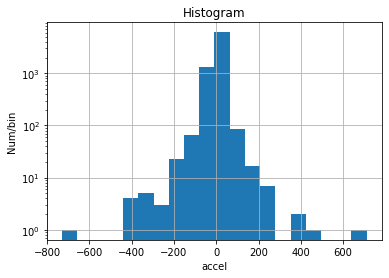

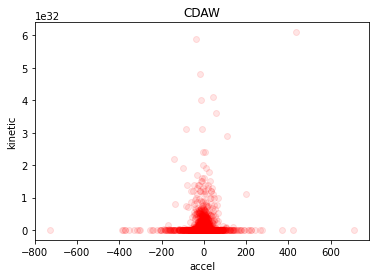

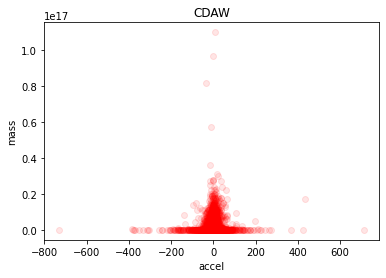

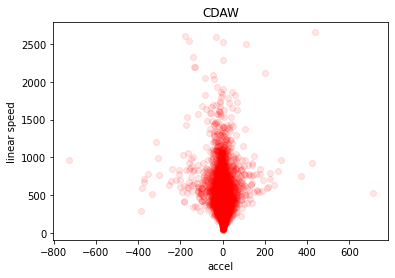

In [27]:
# accel
plot_hist(pd.to_numeric(sbo_data['accel']), nbins=20, what='accel', ylog=True)
plot_data(sbo_data['accel'], sbo_data['kinetic'], ylabel='kinetic', xlabel='accel', title="CDAW", alpha=0.1)
plot_data(sbo_data['accel'], sbo_data['mass'], ylabel='mass', xlabel='accel', title="CDAW", alpha=0.1)
plot_data(sbo_data['accel'], sbo_data['linear'], xlabel='accel', ylabel='linear speed', title="CDAW", alpha=0.1)

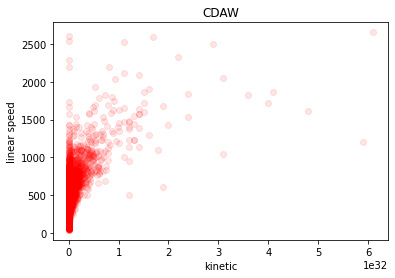

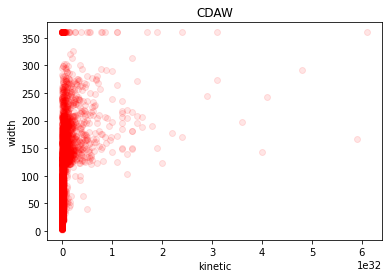

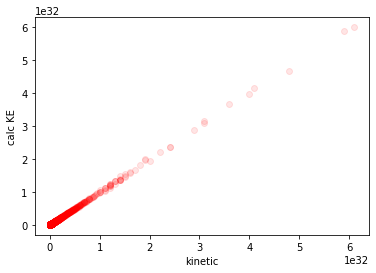

In [43]:
# kinetic
plot_data(sbo_data['kinetic'], sbo_data['linear'], xlabel='kinetic', ylabel='linear speed', title="CDAW", alpha=0.1)
plot_data(sbo_data['kinetic'], sbo_data['width'], xlabel='kinetic', ylabel='width', title="CDAW", alpha=0.1)
plot_data(sbo_data['kinetic'], 0.5*1000000*10000*sbo_data['linear']*sbo_data['linear']*sbo_data['mass'], xlabel='kinetic', ylabel='calc KE', title="", alpha=0.1)

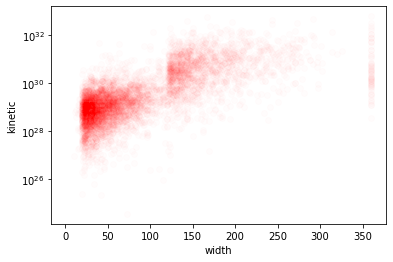

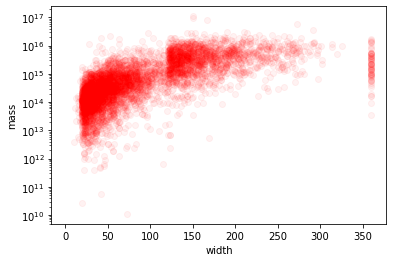

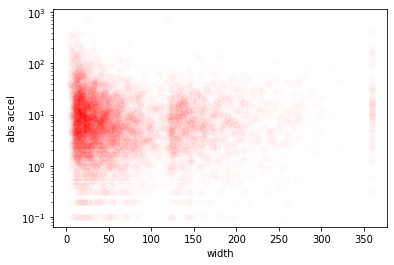

In [44]:
# width
plot_data(sbo_data['width'], sbo_data['kinetic'], ylabel='kinetic', xlabel='width', title="", alpha=0.01, ylog=True)
plot_data(sbo_data['width'], sbo_data['mass'], ylabel='mass', xlabel='width', title="", alpha=0.05, ylog=True)
plot_data(sbo_data['width'], abs(sbo_data['accel']), ylabel='abs accel', xlabel='width', title="", alpha=0.01, ylog=True)

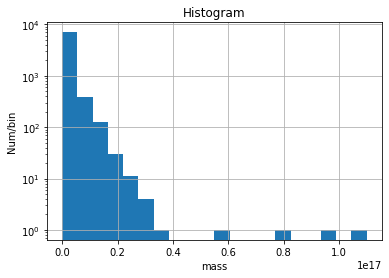

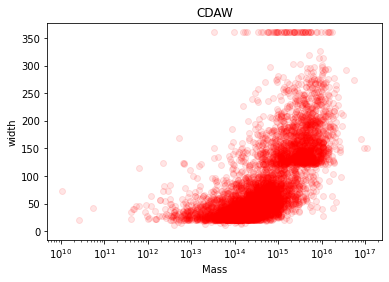

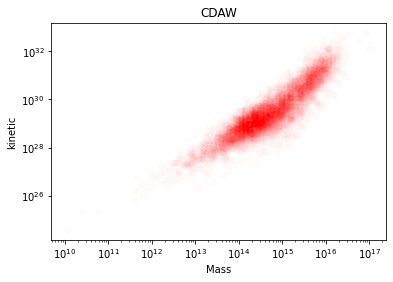

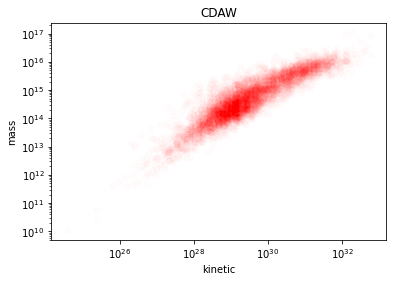

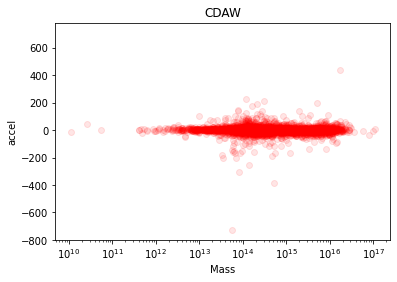

In [48]:
# mass
plot_hist(pd.to_numeric(sbo_data['mass']), nbins=20, what='mass', ylog=True)
plot_data(sbo_data['mass'], sbo_data['width'], ylabel='width', xlabel='Mass', title="CDAW", alpha=0.1, xlog=True)
plot_data(sbo_data['mass'], sbo_data['kinetic'], ylabel='kinetic', xlabel='Mass', title="CDAW", alpha=0.01, ylog=True, xlog=True)
plot_data(sbo_data['kinetic'], sbo_data['mass'], ylabel='mass', xlabel='kinetic', title="CDAW", alpha=0.01, ylog=True, xlog=True)
plot_data(sbo_data['mass'], sbo_data['accel'], ylabel='accel', xlabel='Mass', title="CDAW", alpha=0.1, xlog=True)

In [31]:
# cpa-mpa
#plot_hist(pd.to_numeric(sbo_data['cpa_mpa']), nbins=20, what='CPA - MPA', ylog=True)
#plot_data(sbo_data['kinetic'], sbo_data['cpa_mpa'], xlabel='kinetic', ylabel='CPA-MPA', title="CDAW", alpha=0.1)
#plot_data(sbo_data['kinetic'], abs(sbo_data['cpa_mpa']), xlabel='kinetic', ylabel='Abs(CPA-MPA)', title="CDAW", alpha=0.1, ylog=False)

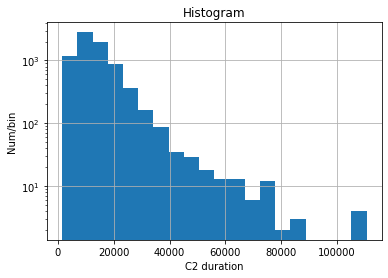

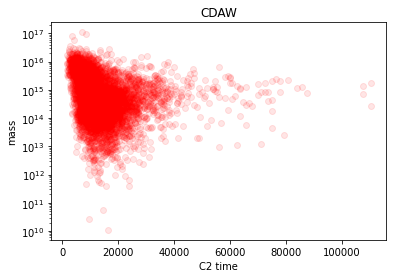

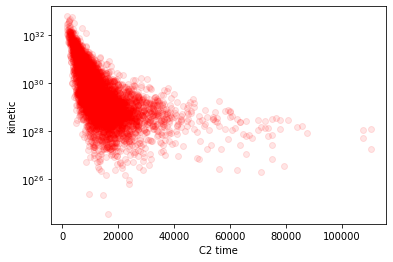

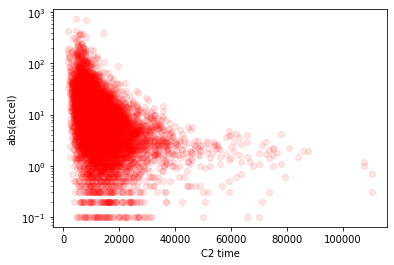

In [50]:
# C2 Duration
plot_hist(sbo_data['c2_time'], nbins=20, what='C2 duration', ylog=True)
plot_data(sbo_data['c2_time'], sbo_data['mass'], ylabel='mass', xlabel='C2 time', title="CDAW", alpha=0.1, ylog=True)
plot_data(sbo_data['c2_time'], sbo_data['kinetic'], ylabel='kinetic', xlabel='C2 time', title="", alpha=0.1, ylog=True)
plot_data(sbo_data['c2_time'], abs(sbo_data['accel']), ylabel='abs(accel)', xlabel='C2 time', title="", alpha=0.1, ylog=True)